# Annotate Village Data

In [ ]:
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scripts.io import read_image, KEY_INPUT_EO, KEY_INPUT_SAR
from scripts.utils import T

In [5]:
def draw_label(img, text, org, font, fontscale=0.75, text_color=(255, 0, 0),
               bg_color=(255, 255, 255), thickness=2, padding=1, radius=4):
    """
    Draws a filled white rectangle behind the text, then the text on top.
    org is the bottom-left corner (x, y) used by cv2.putText.
    """
    (tw, th), baseline = cv2.getTextSize(text, font, fontscale, thickness)
    x, y = org

    # Background rectangle coordinates
    tl = (x - padding, y - th - padding)                      # top-left
    br = (x + tw + padding, y + baseline + padding)           # bottom-right

    # Optional: clamp to image bounds
    h, w = img.shape[:2]
    tl = (max(0, tl[0]), max(0, tl[1]))
    br = (min(w - 1, br[0]), min(h - 1, br[1]))

    # Filled rectangle
    cv2.rectangle(img, tl, br, bg_color, thickness=-1)

    # (Optional) rounded corners by drawing small filled circles
    # if radius > 0:
    #     corners = [tl, (br[0], tl[1]), (tl[0], br[1]), br]
    #     for cx, cy in corners:
    #         cv2.circle(img, (cx, cy), radius, bg_color, -1)

    # Draw text on top
    cv2.putText(img, text, org, font, fontscale, text_color, thickness-1, cv2.LINE_AA)


def add_annotation(img):
    font = cv2.FONT_HERSHEY_DUPLEX
    fontscale = 0.75
    lw = 2

    img_annotated = img.copy()

    # Trees
    draw_label(img_annotated, "Trees", (25, 455), font, fontscale, (255, 0, 0), (255, 255, 255), lw)
    cv2.circle(img_annotated, (45, 480), 20, (255, 0, 0), lw)

    # Lake
    draw_label(img_annotated, "Lake", (385, 175), font, fontscale, (255, 0, 0), (255, 255, 255), lw)
    cv2.circle(img_annotated, (415, 210), 30, (255, 0, 0), lw)

    # Road
    draw_label(img_annotated, "Road", (2, 225), font, fontscale, (255, 0, 0), (255, 255, 255), lw)
    cv2.rectangle(img_annotated, (2, 230), (200, 270), (255, 0, 0), lw)

    # Car park
    draw_label(img_annotated, "Car park", (300, 395), font, fontscale, (255, 0, 0), (255, 255, 255), lw)
    cv2.rectangle(img_annotated, (300, 400), (375, 475), (255, 0, 0), lw)

    # Houses
    draw_label(img_annotated, "Houses", (350, 255), font, fontscale, (255, 0, 0), (255, 255, 255), lw)
    cv2.rectangle(img_annotated, (350, 260), (420, 330), (255, 0, 0), lw)

    return img_annotated

2026-01-16 15:06:55.843266: W external/xla/xla/service/gpu/nvptx_compiler.cc:765] The NVIDIA driver's CUDA version is 12.8 which is older than the ptxas CUDA version (12.9.86). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


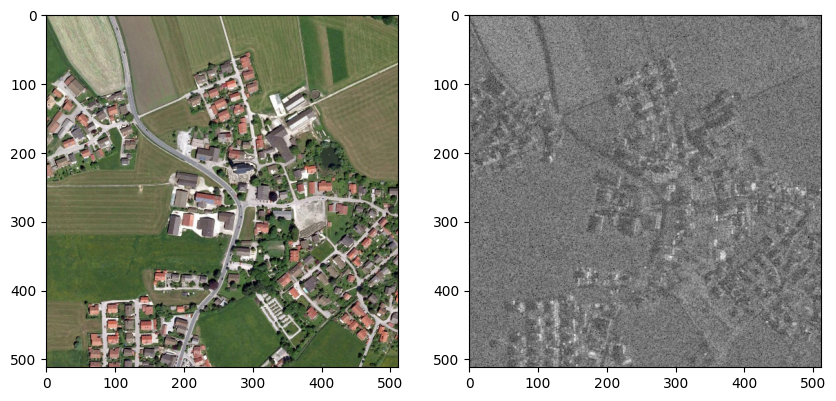

In [6]:
input_path = "../../dataset/data_village.npz"

sar = read_image(input_path, key=KEY_INPUT_SAR).squeeze()
eo = read_image(input_path, key=KEY_INPUT_EO)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(eo)
plt.subplot(1, 2, 2)
plt.imshow(T(sar)[0], cmap='gray')

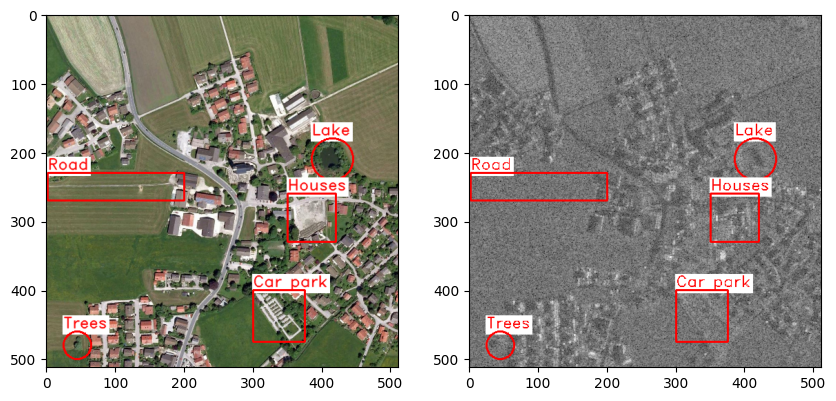

In [7]:
eo_annotated = add_annotation(eo).clip(0, 255).astype(np.uint8)
sar_annotated = add_annotation(np.dstack([T(sar)[0] * 255.] * 3)).clip(0, 255).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(eo_annotated)
plt.subplot(1, 2, 2)
plt.imshow(sar_annotated)

# plt.imsave(Path.home() / 'Downloads' / 'eo_village_annotated.png', eo_annotated, dpi=300) 
# plt.imsave(Path.home() / 'Downloads' / 'sar_village_annotated.png', sar_annotated, dpi=300) 